In [1]:
# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [15]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd


import cv2
#from scipy.misc import imread
from scipy.misc.pilutil import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [17]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [20]:
img_path ="/Users/danielcoelho/Desktop/img1.png"
#if save_webcam_image(img_path) is False:
    #Webcam not active, us the Dog Image
    #img_path = "rocking_chair.jpg"
    #print("Using the Test Rocking Chair Image: {}".format(img_path))

/Users/danielcoelho/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


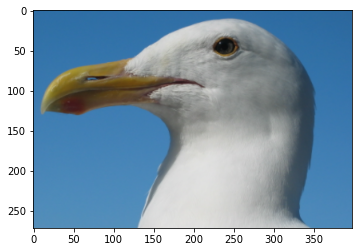

In [21]:
plt.imshow(imread(img_path))

## VGG16 - Pretrained Model

In [24]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights = 'imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [26]:
#img_path="rocking_chair.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results

predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

40960/35363 [==================================] - 0s 1us/step


,Predicted Class,Name,Probability
0,n02058221,albatross,0.942420
1,n01855672,goose,0.052065
2,n01614925,bald_eagle,0.001818
3,n01796340,ptarmigan,0.001266
4,n02009912,American_egret,0.000390
5,n01608432,kite,0.000326
6,n02012849,crane,0.000273
7,n02056570,king_penguin,0.000228
8,n01847000,drake,0.000212
9,n01806143,peacock,0.000192


## Resnet50 - Pretrained Model

In [28]:
# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16

from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights = 'imagenet')
resnet50_model.summary()

102858752/102853048 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
________________________

In [29]:
# Predict Results
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02058221,albatross,0.957734
1,n01855672,goose,0.017221
2,n01614925,bald_eagle,0.008971
3,n01608432,kite,0.003156
4,n01796340,ptarmigan,0.002526
5,n02012849,crane,0.001247
6,n02009912,American_egret,0.001146
7,n01847000,drake,0.000744
8,n02018207,American_coot,0.000679
9,n02002556,white_stork,0.000630
